# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?
Ans: A neuron compute is a linear function (z = Wx + b) followed by an activation function

####  2. Why we use non-linear activation funcitons in neural networks?
Ans: The purpose of the activation function is to introduce non-linearity into the output of a neuron.
A neural network is essentially just a linear regression model without an activation function. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

Without a non-linear function doesn’t matter how many hidden layers we attach in the neutral net all will behave in the same way.Neuron cannot learn with just a linear function attached to it, it requires a non-linear activation function to learn as per the difference.

#### 3. What is the 'Logistic Loss' ?
Ans: In natural language processing, logistic regression is the baseline supervised machine learning algorithm for classification. A neural network can be viewed as a series of logistic regression classifiers stacked on top of
each other. 
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is

-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?
Ans: C. sigmoid  

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

#### 5. Why we don't use zero initialization for all parameters ?
Ans: Zero initialization will unify the output of each nueron as the same.

In [ ]:
#### 6. Can you implement the softmax function using python ? 
Ans:
import numpy as np

def softmax(L):
    exp_L = np.exp(L)
    sum = np.sum(exp_L)
    return exp_L/sum

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [457]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [550]:
# Loading the data 
digits = datasets.load_digits()

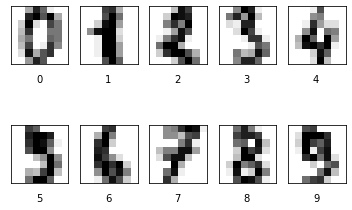

In [551]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [552]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25)

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px  ∗  num_px  ∗  3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T         # X.T is the transpose of X

In [530]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape(y_train.shape[0], -1).T
y_test = y_test.reshape(y_test.shape[0], -1).T

In [531]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 1347)
(64, 450)
(1, 1347)
(1, 450)


#### 3- Architecture of the neural network

![title](./networks.png)

In [4]:
!pwd

/Users/limingxiao/Desktop/NLP_Lectures/jupyters_and_slides/2019-spring


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [367]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1/(1 + np.exp(-z))
    
    return s

In [300]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [368]:
# Random innitialize the parameters
import numpy as np
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.zeros([dim,1]) 
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b
dim = 2
w, b = initialize_parameters(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0


#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$  
. J = $-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$     


Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [369]:
import math
import numpy as np
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))   
    
    dw = 1 / m *(np.dot(X, (A - Y).T))
    db = 1 / m *(np.sum(A - Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [370]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [481]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [482]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [483]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [307]:
print ("predictions = " + str(predict(np.array([[1],[2]]), 1.5593049248448891, np.array([[1,2],[3,4]]))))

predictions = [[1. 1.]]


##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [534]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # initialize parameters with zeros 
    w, b = initialize_parameters(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations= num_iterations, learning_rate = learning_rate, print_cost = print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    d = { "w":w,
          "b":b,
          "training_accuracy": 100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100,
        "test_accuracy":100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100,
        "costs":costs,
         "learning_rate": learning_rate,
         "num_iterations" : num_iterations
    }
    
    return d


In [535]:
d = model(X_train, y_train, X_test, y_test, num_iterations= 2000, learning_rate = 0.005, print_cost= True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.294977
Cost after iteration 200: 0.270157
Cost after iteration 300: 0.259235
Cost after iteration 400: 0.253246
Cost after iteration 500: 0.249565
Cost after iteration 600: 0.247134
Cost after iteration 700: 0.245442
Cost after iteration 800: 0.244218
Cost after iteration 900: 0.243303
Cost after iteration 1000: 0.242601
Cost after iteration 1100: 0.242050
Cost after iteration 1200: 0.241608
Cost after iteration 1300: 0.241247
Cost after iteration 1400: 0.240948
Cost after iteration 1500: 0.240696
Cost after iteration 1600: 0.240481
Cost after iteration 1700: 0.240296
Cost after iteration 1800: 0.240134
Cost after iteration 1900: 0.239992
train accuracy: 91.01707498144023 %
test accuracy: 88.66666666666667 %


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

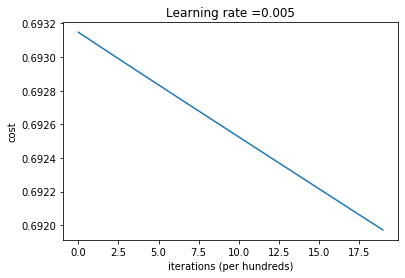

In [533]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 90.94283593170007 %
test accuracy: 87.77777777777777 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 90.05196733481812 %
test accuracy: 89.33333333333333 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 87.08240534521158 %
test accuracy: 84.88888888888889 %

-------------------------------------------------------



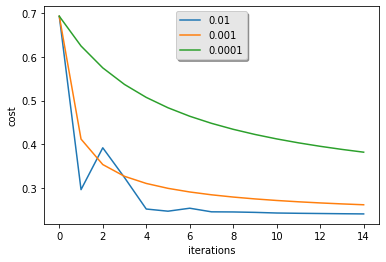

In [536]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations=1500, learning_rate=i, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Observation
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. 

##### 4.2 Observe the effect of iteration_num on the test accuracy.

num_iterations is: 100
train accuracy: 86.41425389755011 %
test accuracy: 84.88888888888889 %

-------------------------------------------------------

num_iterations is: 200
train accuracy: 87.30512249443207 %
test accuracy: 85.33333333333333 %

-------------------------------------------------------

num_iterations is: 300
train accuracy: 87.97327394209354 %
test accuracy: 86.88888888888889 %

-------------------------------------------------------

num_iterations is: 500
train accuracy: 89.30957683741649 %
test accuracy: 87.55555555555556 %

-------------------------------------------------------

num_iterations is: 1000
train accuracy: 89.60653303637713 %
test accuracy: 88.0 %

-------------------------------------------------------

num_iterations is: 1500
train accuracy: 90.05196733481812 %
test accuracy: 89.33333333333333 %

-------------------------------------------------------



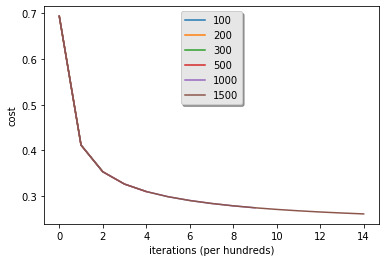

In [537]:
num_iterations = [100, 200, 300, 500, 1000,1500]
models = {}
for i in num_iterations:
    print ("num_iterations is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations=i, learning_rate=0.001, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in num_iterations:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["num_iterations"]))

plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Observation
- In this case, different interation numbers seems has no impact on the cost and then no impact on the predict result in this case.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [589]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape(y_train.shape[0], -1).T
y_test = y_test.reshape(y_test.shape[0], -1).T
X_train = X_train/255
X_test = X_test / 255
y_train = y_train/255
y_test = y_test/255

In [590]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 1347)
(64, 450)
(1, 1347)
(1, 450)


In [591]:
import numpy as np
import math

def softmax(x):
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = softmax(np.dot(w.T,X) + b)
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))   
    
    dw = 1 / m *(np.dot(X, (A - Y).T))
    db = 1 / m *(np.sum(A - Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [592]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.47628706]
 [0.47628706]]
db = 5.551115123125783e-17
cost = 3.048587351573744


In [593]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = softmax(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [594]:
print ("predictions = " + str(predict(np.array([[1],[2]]), 1.5593049248448891, np.array([[1,2],[3,4]]))))

predictions = [[0. 1.]]


In [595]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # initialize parameters with zeros 
    w, b = initialize_parameters(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations= num_iterations, learning_rate = learning_rate, print_cost = print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    d = { "w":w,
          "b":b,
          "training_accuracy": 100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100,
        "test_accuracy":100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100,
        "costs":costs,
         "learning_rate": learning_rate,
         "num_iterations" : num_iterations
    }
    
    return d

In [596]:
d = model(X_train, y_train, X_test, y_test, num_iterations= 1500, learning_rate = 0.005, print_cost= False)

train accuracy: 99.99999989447724 %
test accuracy: 99.99295997266009 %


# Congratulations ! You have completed assigment 4. 